DATA: USED HERE IS FROM THE OPEN SOURCE EQUINOR DATABASE

Here I attempt to 
1. derive porosity from Archie principle
2. Used the porosity to derive rock bulk density.
3. Compared the results in a plot 

$$
S^{n}_{w} = \frac{a.R_{w}}{{\phi^m} R_{t}}
$$
or 
$$
S_{w} = \sqrt[n]\frac{a.R_{w}}{{\phi^m} R_{t}}
$$


Sw: water saturation  
a: tortuosity factor   
𝜙: porosity  
m: cementation exponent   
n: saturation exponent   
Rw: brine resistivity   
Rt: True Resistivity (equivalent to a deep resistivity log reading)  

In [1]:
import sys
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d


In [3]:
%matplotlib notebook

# Read data

## Reading txt file

In [4]:
txtfile='Well_32_4.txt'

lines = open(txtfile).read().splitlines()
lines

['# LAS format log file from PETREL',
 '# Project units are specified as depth units',
 '#==================================================================',
 '~Version information',
 'VERS.   2.0:',
 'WRAP.   NO:',
 '#==================================================================',
 '~Well',
 'STRT .m      385.00000000 :',
 'STOP .m      3199.9804688 :',
 'STEP .m     0.00000000 :',
 'NULL .        -999.250000 :',
 'COMP.           : COMPANY',
 'WELL.  32/4-1   : WELL',
 'FLD.            : FIELD',
 'LOC.            : LOCATION',
 'SRVC.           : SERVICE COMPANY',
 'DATE.  2020-10-21 13:51:53   : Log Export Date {yyyy-MM-dd HH:mm:ss}',
 'PROV.           : PROVINCE',
 'UWI.      : UNIQUE WELL ID',
 'API.            : API NUMBER',
 '#==================================================================',
 '~Curve',
 'DEPT .m                   : DEPTH',
 'BIT .in                   : BIT',
 'DEN .g/cm3                : DEN',
 'Generaltime1 .ms          : General time 1',
 'Generaltime1

In [5]:
# count the line numbers
curves_names_start=23 
curves_names_end=41
log_data_start=44

#Read the name of the curves from txt and write them in csv file:
curves=[]
for line in lines[curves_names_start:curves_names_end]: # picks the line intervals with the curves
        curves.append(line.split()[0].split(' ')[0])
        header=str(curves).replace("['","").replace("']","").replace("', '"," ")
f=open('Well_32.csv','w') # stores the file as csv
f.write(header +'\n') # writes the headers

# #Then read the log data which starts at line 40 and write in the csv file
for text in lines[log_data_start:]:
        f.write(str(text).replace("['","").replace("']","")+'\n')
f.close()

## Reading the csv file

In [6]:

df=pd.read_csv('Well_32.csv',delim_whitespace=True, na_values=-999.25)
df.describe()

,DEPT,BIT,DEN,Generaltime1,Generaltime1.1,Generaltime1.2,GR,HAC,HCAL,HRD,HRS,KLOGH,KTH,PHIT,Porosity(Welltops2),SPD,"ZCOR',",Zoneloglinkedto'Reslab']
count,18472.000000,17491.000000,13465.000000,0.0,0.0,0.0,18086.000000,16494.000000,17495.000000,16055.000000,18145.000000,13251.000000,17322.000000,13251.000000,498.000000,17487.000000,13474.000000,3792.000000
mean,1792.490139,9.396604,2.407946,NaN,NaN,NaN,86.889110,89.223131,10.334268,5.953841,232.635887,347.041169,67.879557,0.173515,0.161448,0.129873,0.041795,3.533755
std,812.680811,1.599535,0.224584,NaN,NaN,NaN,24.009545,35.421222,66.859328,27.299190,4556.606871,1306.808271,16.506527,0.135539,0.043869,0.035429,0.112846,3.411143
min,385.000000,8.500000,1.151439,NaN,NaN,NaN,0.000000,-3846.739258,2.798014,0.367917,-8223.605469,0.001000,0.000000,0.000000,0.104027,0.042239,-1.251113,0.000000
25%,1088.745117,8.500000,2.320680,NaN,NaN,NaN,69.302536,76.889908,8.639241,1.392548,1.351012,0.001000,56.680752,0.082001,0.115171,0.102864,0.020541,2.000000
50%,1792.490234,8.500000,2.448037,NaN,NaN,NaN,81.882858,86.934895,8.797634,2.055062,2.336545,0.017898,65.263710,0.148301,0.164286,0.120834,0.032303,2.000000
75%,2496.235352,8.500000,2.560114,NaN,NaN,NaN,101.235191,99.088314,9.849085,4.306918,4.803802,1.155105,76.478600,0.225601,0.200405,0.158825,0.054515,5.000000
max,3199.980469,12.250001,2.808156,NaN,NaN,NaN,205.892853,155.816406,5441.939453,622.868164,100000.000000,6000.000000,159.354492,0.932500,0.240174,0.392693,0.380418,13.000000


### Remove columns that are completely NaN

In [7]:
df = df.drop(columns=['Generaltime1','Generaltime1.1','Generaltime1.2'])
df.describe()

,DEPT,BIT,DEN,GR,HAC,HCAL,HRD,HRS,KLOGH,KTH,PHIT,Porosity(Welltops2),SPD,"ZCOR',",Zoneloglinkedto'Reslab']
count,18472.000000,17491.000000,13465.000000,18086.000000,16494.000000,17495.000000,16055.000000,18145.000000,13251.000000,17322.000000,13251.000000,498.000000,17487.000000,13474.000000,3792.000000
mean,1792.490139,9.396604,2.407946,86.889110,89.223131,10.334268,5.953841,232.635887,347.041169,67.879557,0.173515,0.161448,0.129873,0.041795,3.533755
std,812.680811,1.599535,0.224584,24.009545,35.421222,66.859328,27.299190,4556.606871,1306.808271,16.506527,0.135539,0.043869,0.035429,0.112846,3.411143
min,385.000000,8.500000,1.151439,0.000000,-3846.739258,2.798014,0.367917,-8223.605469,0.001000,0.000000,0.000000,0.104027,0.042239,-1.251113,0.000000
25%,1088.745117,8.500000,2.320680,69.302536,76.889908,8.639241,1.392548,1.351012,0.001000,56.680752,0.082001,0.115171,0.102864,0.020541,2.000000
50%,1792.490234,8.500000,2.448037,81.882858,86.934895,8.797634,2.055062,2.336545,0.017898,65.263710,0.148301,0.164286,0.120834,0.032303,2.000000
75%,2496.235352,8.500000,2.560114,101.235191,99.088314,9.849085,4.306918,4.803802,1.155105,76.478600,0.225601,0.200405,0.158825,0.054515,5.000000
max,3199.980469,12.250001,2.808156,205.892853,155.816406,5441.939453,622.868164,100000.000000,6000.000000,159.354492,0.932500,0.240174,0.392693,0.380418,13.000000


### Seawater depth correction

In [8]:
#Accounting the depth of water column
water_depth = 320 #mbsf
df['DEPT_mbsf']=df['DEPT'] - water_depth
df['DEPT_mbsf']

0          65.000000
1          65.152405
2          65.304810
3          65.457214
4          65.609558
            ...     
18467    2879.370605
18468    2879.522949
18469    2879.675293
18470    2879.828125
18471    2879.980469
Name: DEPT_mbsf, Length: 18472, dtype: float64

<IPython.core.display.Javascript object>


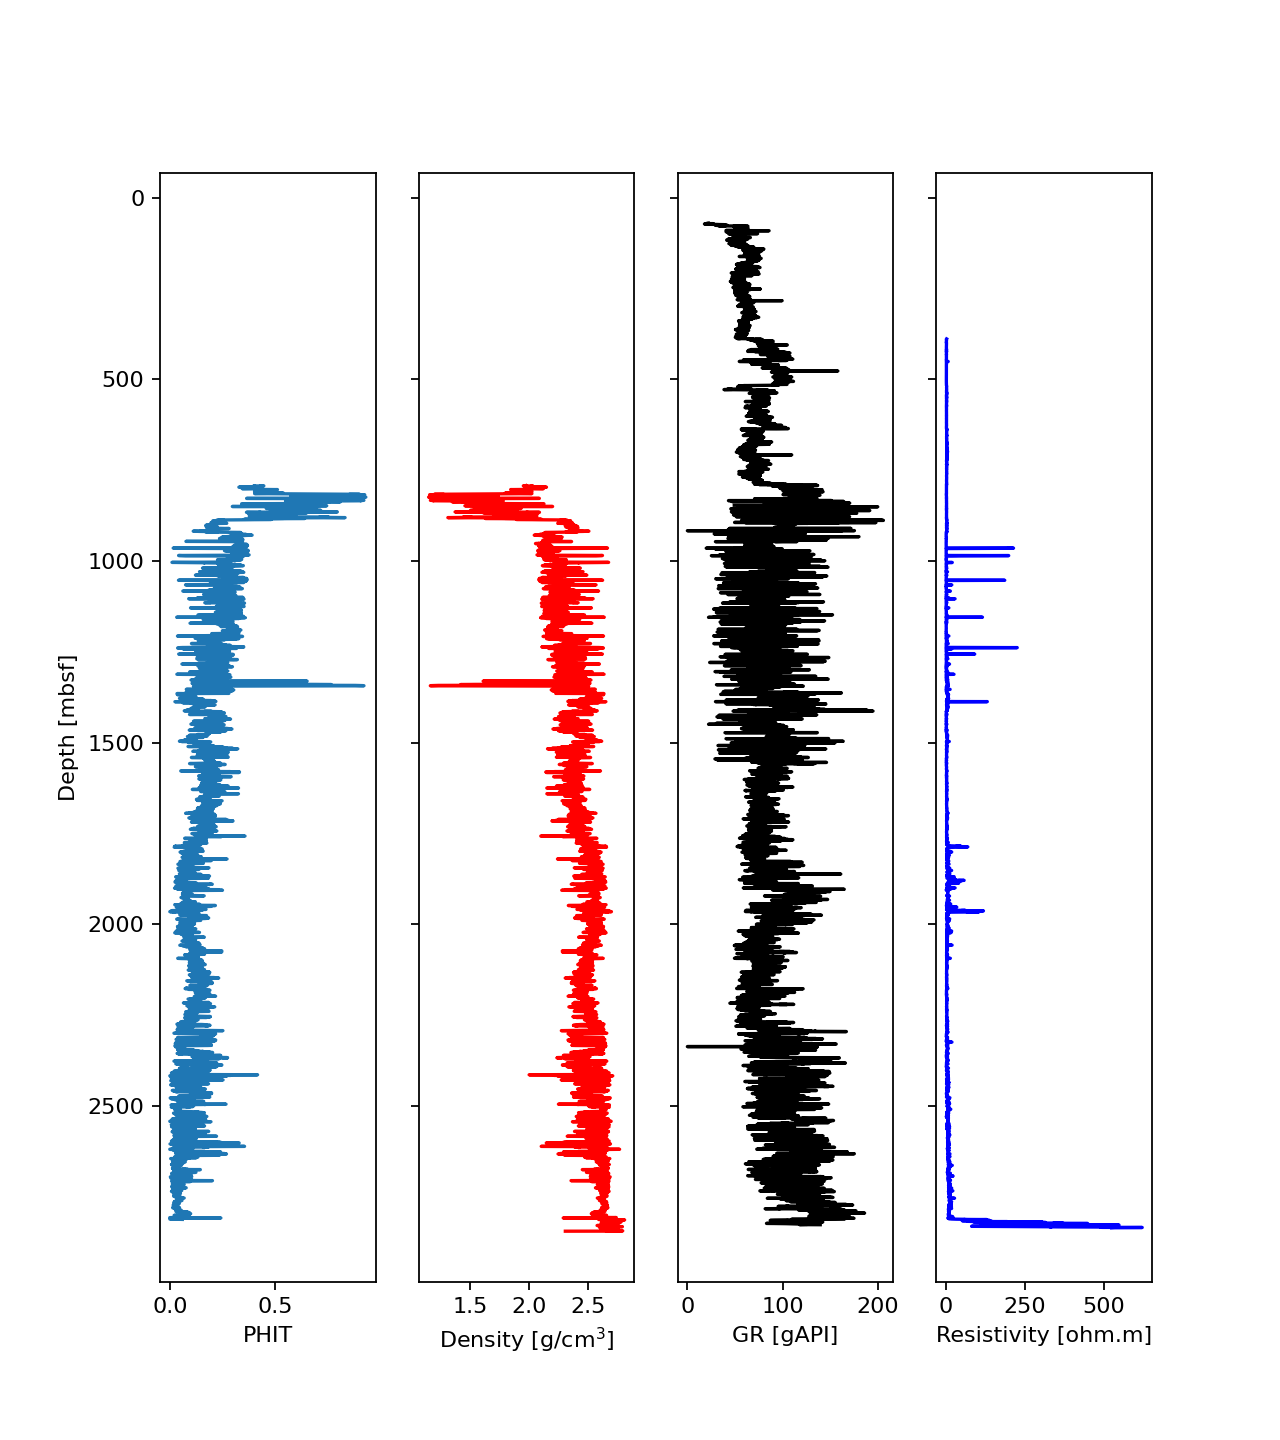

Text(0.5, 0, 'Resistivity [ohm.m]')

In [47]:
fig, axs=plt.subplots(1,4,figsize=(8,9), sharey=True)
ax=axs[0]
ax.plot(df['PHIT'], df['DEPT_mbsf'])
ax.set_ylabel('Depth [mbsf]')
ax.set_xlabel('PHIT')
ax.invert_yaxis()

ax=axs[1]
ax.plot(df['DEN'], df['DEPT_mbsf'], c='r')
ax.set_xlabel('Density [$\mathrm{g /cm^3}$]')

ax=axs[2]
ax.plot(df['GR'], df['DEPT_mbsf'], c='k')
ax.set_xlabel('GR [gAPI]')


ax=axs[3]
ax.plot(df['HRD'], df['DEPT_mbsf'], c='b')
ax.set_xlabel('Resistivity [ohm.m]')


 # POROSITY from ARCHIE'S law

$$
S_{w} = \sqrt[n]\frac{a.R_{w}}{{\phi^m} R_{t}}
$$ 

References: Sylvain Bourlange,et al., 2003 

Generalized Archie’s law links formation factor and porosity.  
$$ 
\ F = \frac{a}{\phi^{m}}
$$
where a: constant = 1   

In a rock with non-conducting grains, the bulk conductivity depends linearly on the conductivity
of the fluid, and the formation factor F is conveniently depend as the ratio of fluid conductivity cf
to bulk conductivity c :

 The formation factor is calculated as 
$$
F = \frac{Ro}{R_f}
$$
Ro=Rw: Resistivity of rock with only water (Sw = 1)

## Fluid resistivity

We assumed that the pore fluid is similar to seawater. The formula used to calculate the resistivity of seawater (Rf) as a function of temperature T (°C) is as follows (Shipley et al., 1995):

$$
R_f = \frac{1}{2.803+0.0996T}
$$


$$
T = (\frac{H_{t}.z}{\sigma}) + T_{s}
$$

In [10]:
#Values are obtained from cited sources stated below

surface_heat_flow=64/1e3 #in W/m2 #This is an median value for the North Sea regional heat flow ref: DOI: 10.1016/j.marpetgeo.2015.08.006
constant_thermal_conductivity=1.8 + (df['DEPT_mbsf']-400)/2000 # for depth above 400mbsf # 1.8 W/m.k Average values ref: DOI: 10.1144/GSL.SP.2000.167.01.15
surface_temperature=6.5 # Average value taken from # ref: Andrews-Speed, C P, Cooper, B A, and Oxburgh, E R. Temperatures and depth-dependent heat flow in western North Sea. United States: N. p., 1984. Web.

def geothermal_gradient(𝐻𝑡,𝜎,z,𝑇𝑠):
    """
    𝐻𝑡: surface_heat_flow in W/m2 
    𝜎: constant_thermal_conductivity in W/m.k
    z: depth in mbsf
    𝑇𝑠: surface_temperature in degree celsius
    """
    return ((𝐻𝑡/𝜎)*z) + 𝑇𝑠 



In [11]:
df['temp_C'] = geothermal_gradient(𝐻𝑡=surface_heat_flow,
                                   𝜎=constant_thermal_conductivity,
                                   z=df['DEPT_mbsf'],
                                   𝑇𝑠=surface_temperature)

df['temp_C'].describe()

count    18472.000000
mean        44.031763
std         16.343759
min          9.048239
25%         31.293574
50%         46.837966
75%         58.312859
max         67.131363
Name: temp_C, dtype: float64

In [12]:
def fluid_resistivity(T):
    """
    T: Geothermal_gradient
    """
    
    return 1/(2.803 + 0.0996*T)

In [13]:
df['Fluid_resistivity'] = fluid_resistivity(T =df['temp_C'] ) 
df['Fluid_resistivity'].describe()

count    18472.000000
mean         0.148023
std          0.040546
min          0.105382
25%          0.116131
50%          0.133904
75%          0.168923
max          0.269963
Name: Fluid_resistivity, dtype: float64

 ## Formation factor computation

 The formation factor is calculated as 
$$
F = \frac{Ro}{R_f}
$$


In [14]:
def formation_factor(R, 𝑅𝑓):
    """
    R: formation resistivity ohm.m
    Rf: Fluid resistivity ohm.m
    
    """
    
    return R/𝑅𝑓

In [15]:
df['Formation_factor'] =formation_factor(R=df['HRD'],
                                        𝑅𝑓=df['Fluid_resistivity'])
df['Formation_factor'].describe()

count    16055.000000
mean        51.106175
std        253.788713
min          2.373365
25%          8.564344
50%         15.609751
75%         35.490707
max       5878.800094
Name: Formation_factor, dtype: float64

## Porosity Computation


This implies that Porosity (𝜙) is given as:
$$ 
\phi = \sqrt[m]{\frac{a}{F}}
$$

In [16]:
a=1
m=1.5
def porosity(F,a=a,m=m):
    """
    
    """
    return (1/F)**(1/m)

In [17]:
df['porosity_archie']= porosity(F=df['Formation_factor'])
df['porosity_archie'].describe()
                               

count    16055.000000
mean         0.177857
std          0.107000
min          0.003070
25%          0.092596
50%          0.160104
75%          0.238893
max          0.562027
Name: porosity_archie, dtype: float64

In [19]:
#remove Nans
df['porosity_archie'] = df['porosity_archie'][~np.isnan(df['porosity_archie'])]
df['porosity_archie'].describe()

count    16055.000000
mean         0.177857
std          0.107000
min          0.003070
25%          0.092596
50%          0.160104
75%          0.238893
max          0.562027
Name: porosity_archie, dtype: float64

# Bulk Density

Giving bulk density as
$$
\rho_b = \Phi  \rho_w + (1 - \Phi)  \rho_r
$$
where   
𝜌𝑏 : Bulk density   
Φ : porosity      
𝜌𝑤 : water_density and    
𝜌𝑟 : density_matrix

In [20]:
# This is an approximate value assuming continous density for all formation (It is not so in the real sense).
# This assumption is because there is no Moisture and density (MAD) data: 
# But always confirm if you have the MAD data source 
density_matrix = 2.65 # g/cm3 # This is an average value
d_seawater=1.024 # g/cm3

def compute_bulk_density(porosity, density_matrix,water_density=1.024):
    return porosity*water_density+(1-porosity)*density_matrix

In [21]:
# Porosity was derived in #2 from onboard porosity from LWD
# Density Matrix was grossly extrapoloted in #3.2 from sparse MAD data

df['bulk_density'] = compute_bulk_density(porosity=df['porosity_archie'], 
                                          density_matrix=density_matrix,
                                          water_density=d_seawater)
df['bulk_density'].describe()

count    16055.000000
mean         2.360804
std          0.173982
min          1.736145
25%          2.261560
50%          2.389671
75%          2.499440
max          2.645008
Name: bulk_density, dtype: float64

# PLOT

<IPython.core.display.Javascript object>


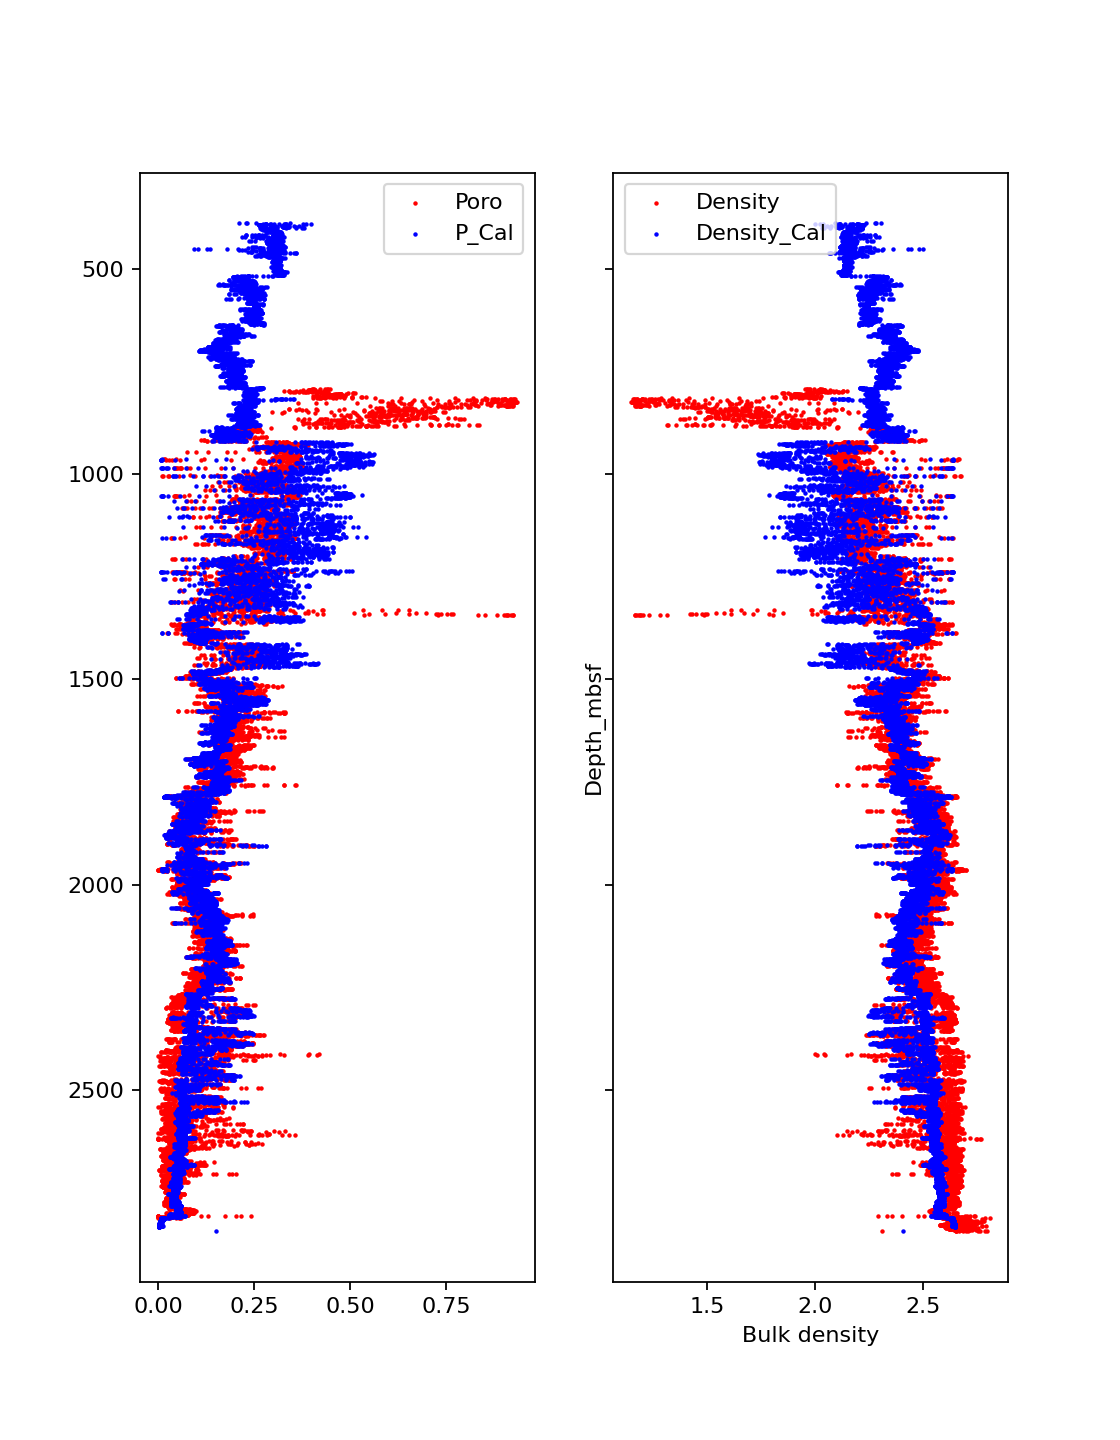

Text(0.5, 0, 'Bulk density')

In [29]:
fig, axs=plt.subplots(1,2,figsize=(7,9), sharey=True)
ax=axs[0]
ax.scatter(df['PHIT'], df['DEPT_mbsf'],c='r', s=1, label='Poro')
ax.scatter(df['porosity_archie'], df['DEPT_mbsf'], c='b',s=1, label='P_Cal')
ax.legend()
ax.invert_yaxis()

ax=axs[1]
ax.scatter(df['DEN'], df['DEPT_mbsf'],c='r', s=1, label='Density')
ax.scatter(df['bulk_density'], df['DEPT_mbsf'], c='b',s=1, label='Density_Cal')
ax.legend(loc='upper left')

ax.set_ylabel('Depth_mbsf')
ax.set_xlabel('Bulk density')


<IPython.core.display.Javascript object>


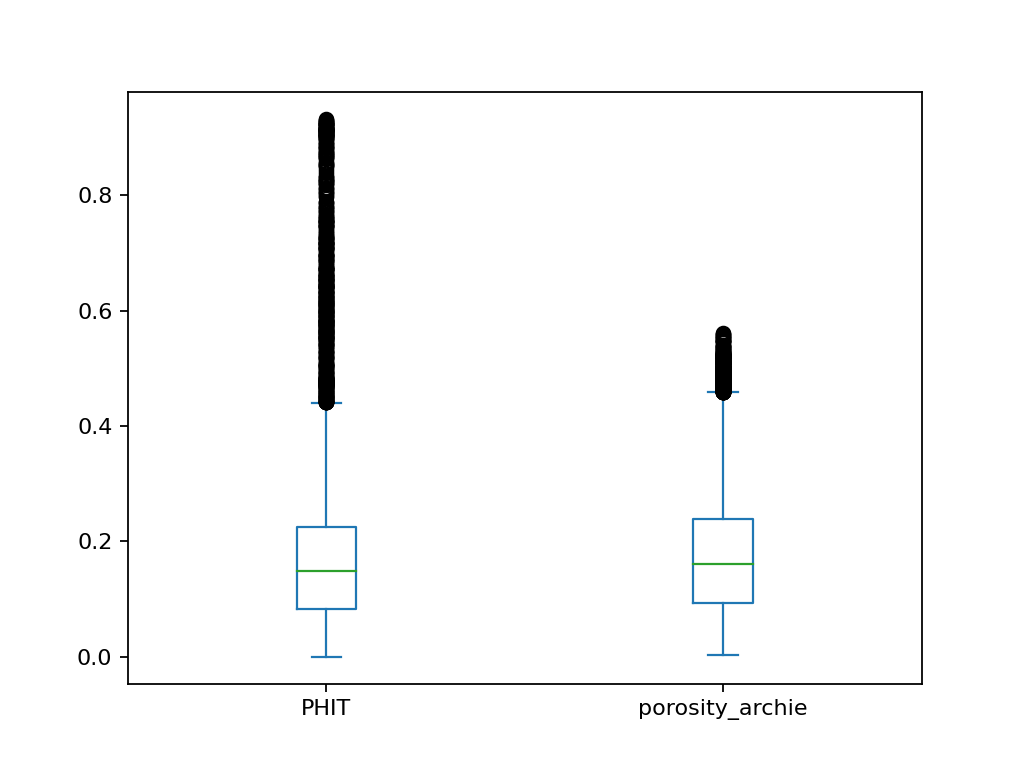

<IPython.core.display.Javascript object>


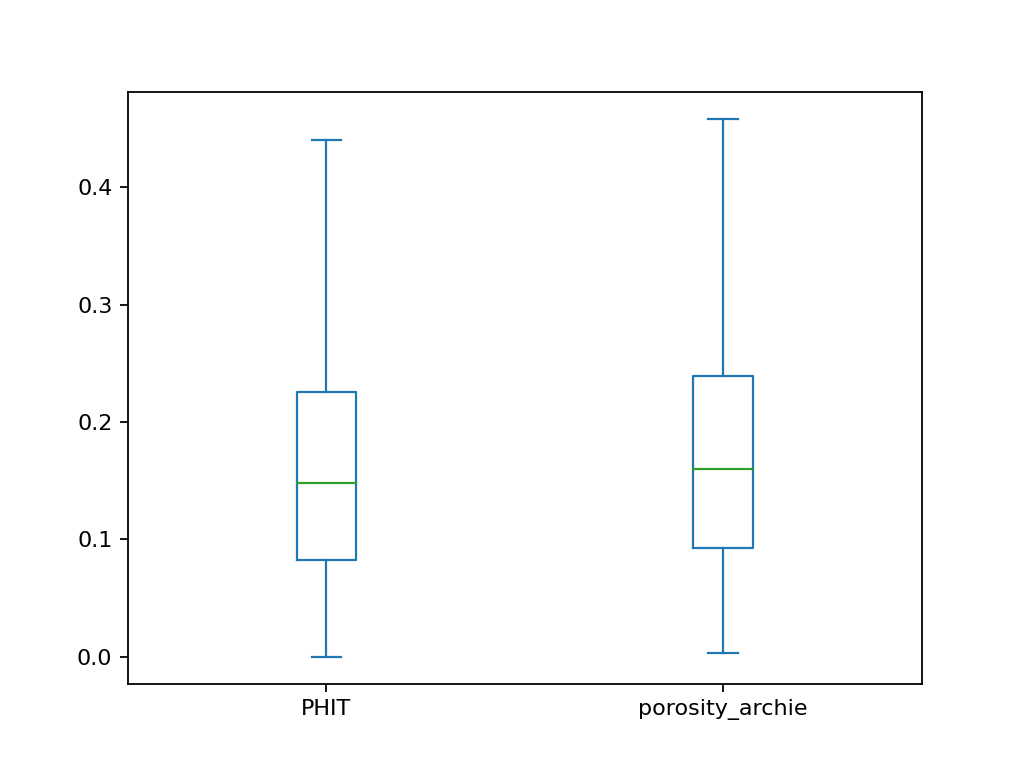

<AxesSubplot:>

In [40]:
# fig,ax=plt.subplots(figsize=(8,8),sharex=True)
df[['PHIT','porosity_archie' ]].plot.box()
df[['PHIT','porosity_archie' ]].plot.box(showfliers=False)



<IPython.core.display.Javascript object>


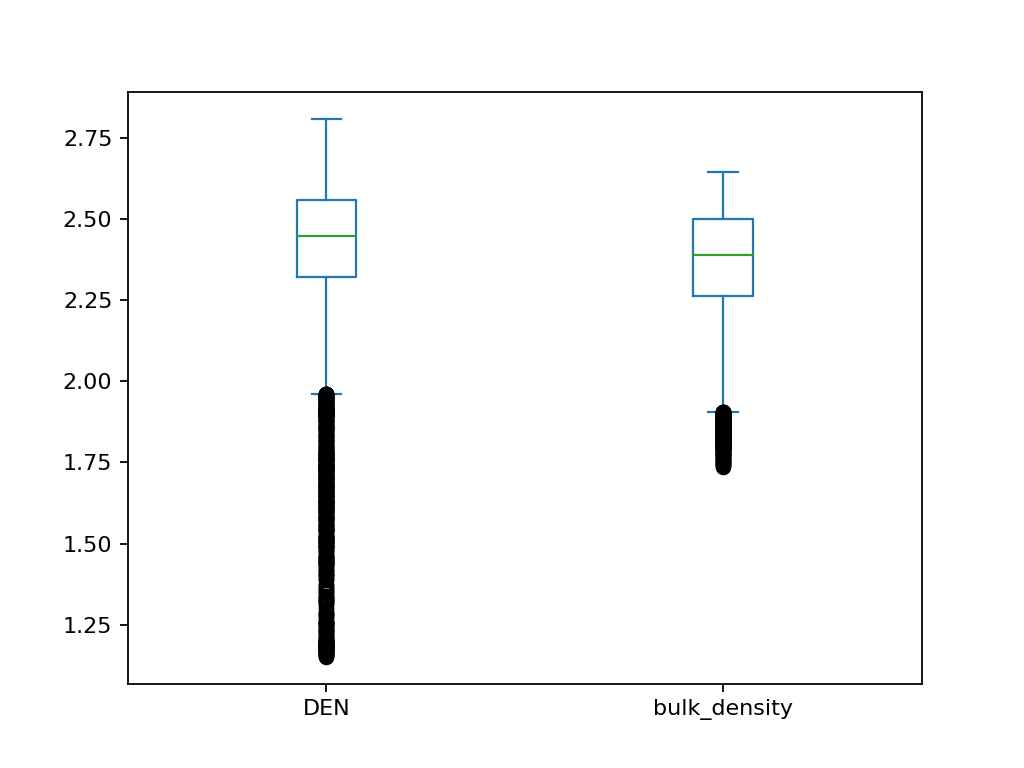

<IPython.core.display.Javascript object>


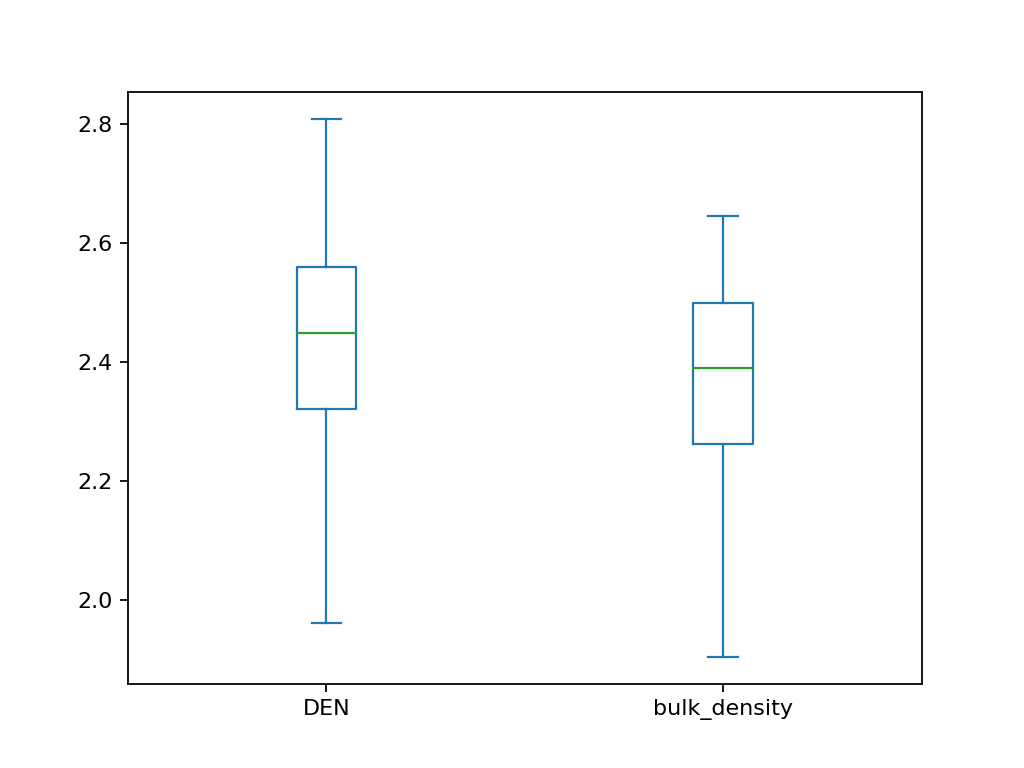

<AxesSubplot:>

In [39]:
df[['DEN','bulk_density' ]].plot.box()
df[['DEN','bulk_density' ]].plot.box(showfliers=False)

# Export

In [26]:
import pickle

In [27]:
# save pickle data
pickle.dump(df, open("Porosity_Archie_df.pickle","wb"))

# REFERENCE

1. Andrews-Speed, C. P., Oxburgh, E. R., & Cooper, B. A. (1984). Temperatures and Depth-Dependent Heat Flow in Western North Sea. American Association of Petroleum Geologists Bulletin, 68(11), 1764–1781. https://doi.org/10.1306/ad461999-16f7-11d7-8645000102c1865d

2. Bourlange, S., Henry, P., Moore, J. C., Mikada, H., & Klaus, A. (2003). Fracture porosity in the décollement zone of Nankai accretionary wedge using Logging While Drilling resistivity data. Earth and Planetary Science Letters, 209(1–2), 103–112. https://doi.org/10.1016/S0012-821X(03)00082-7

3. Liss, P. S., & Slater, P. G. (1974). © 1974 Nature Publishing Group.

4. Pascal, C. (2015). Heat flow of Norway and its continental shelf. Marine and Petroleum Geology, 66(August 2015), 956–969. https://doi.org/10.1016/j.marpetgeo.2015.08.006

4. Pickett, G. R. (1966). A Review of Current Techniques for Determination of Water Saturation From Logs. Journal of Petroleum Technology, 18(11), 1425–1433. https://doi.org/10.2118/1446-pa

5. Sarkar, A. D., & Huuse, M. (2022). Reflection seismic thermometry. Basin Research, 34(1), 3–24. https://doi.org/10.1111/bre.12608

6. Shipley, T.H., Ogawa, Y., Blum, P., et al., 1995. Proc. ODP, Init. Repts., 156: College Station, TX (Ocean Drilling Program).
doi:10.2973/odp.proc.ir.156.1995

7. Sundvor, E., Eldholm, O., Gladczenko, T. P., & Planke, S. (2000). Norwegian-Greenland Sea thermal field. Geological Society Special Publication, 167, 397–410. https://doi.org/10.1144/GSL.SP.2000.167.01.15

https://wiki.aapg.org/Well_log_analysis_for_reservoir_characterization

https://geolumina.org/wp-content/uploads/2020/01/Archie_Equation_Cheatsheet.pdf